In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [2]:
data = pd.read_csv('Anime.csv')
data.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

In [3]:
data.describe()

anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
# we will find duplicate values present 
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12289    False
12290    False
12291    False
12292    False
12293    False
Length: 12294, dtype: bool

In [6]:
data.duplicated().sum()

0

In [7]:
# so there are no duplcate values 
# lets check if there is any column having different datatype 
data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [8]:
# all the columns have correct datatypes as per the records in it 
# but lets check for episodes column once as it has all numeric values but still showing object as its datatype 
data['episodes'].value_counts()

episodes
1      5677
2      1076
12      816
13      572
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: count, Length: 187, dtype: int64

In [9]:
data['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [10]:
# we will convert the datatype back to int 
data['episodes'] = pd.to_numeric(data['episodes'], errors = 'coerce')
data['episodes'] = data['episodes'].fillna(0)
data['episodes'] = data['episodes'].astype(int)

In [11]:
data['episodes'].dtype

dtype('int32')

In [12]:
# checking for missing values 
data.isna()

anime_id   name  genre   type  episodes  rating  members
0         False  False  False  False     False   False    False
1         False  False  False  False     False   False    False
2         False  False  False  False     False   False    False
3         False  False  False  False     False   False    False
4         False  False  False  False     False   False    False
...         ...    ...    ...    ...       ...     ...      ...
12289     False  False  False  False     False   False    False
12290     False  False  False  False     False   False    False
12291     False  False  False  False     False   False    False
12292     False  False  False  False     False   False    False
12293     False  False  False  False     False   False    False

[12294 rows x 7 columns]

In [13]:
data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [14]:
for i in data.isna().sum():
    print((i/len(data))*100)

0.0
0.0
0.504311046038718
0.20335122824141857
0.0
1.8708312998210508
0.0


In [15]:
# we will treat these values now 
# we have a rule says that if columns are numeric check for outliers in that columns 
# if outliers are present replace missing values with median 
# if no outliers are present replace missing values with mean 
# if column is categorical replace missing values with mode 
# from the results we have two categorical columns so we will replace missing values with mode 
data['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [16]:
data['genre'].mode()

0    Hentai
Name: genre, dtype: object

In [17]:
data['genre'].mode()[0]

'Hentai'

In [18]:
data['genre'].fillna(data['genre'].mode()[0],inplace=True)

In [19]:
# for column type 
data['type'].mode()[0]

'TV'

In [20]:
data['type'].fillna(data['type'].mode()[0],inplace=True)

In [21]:
data.isna().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

<Axes: xlabel='rating'>

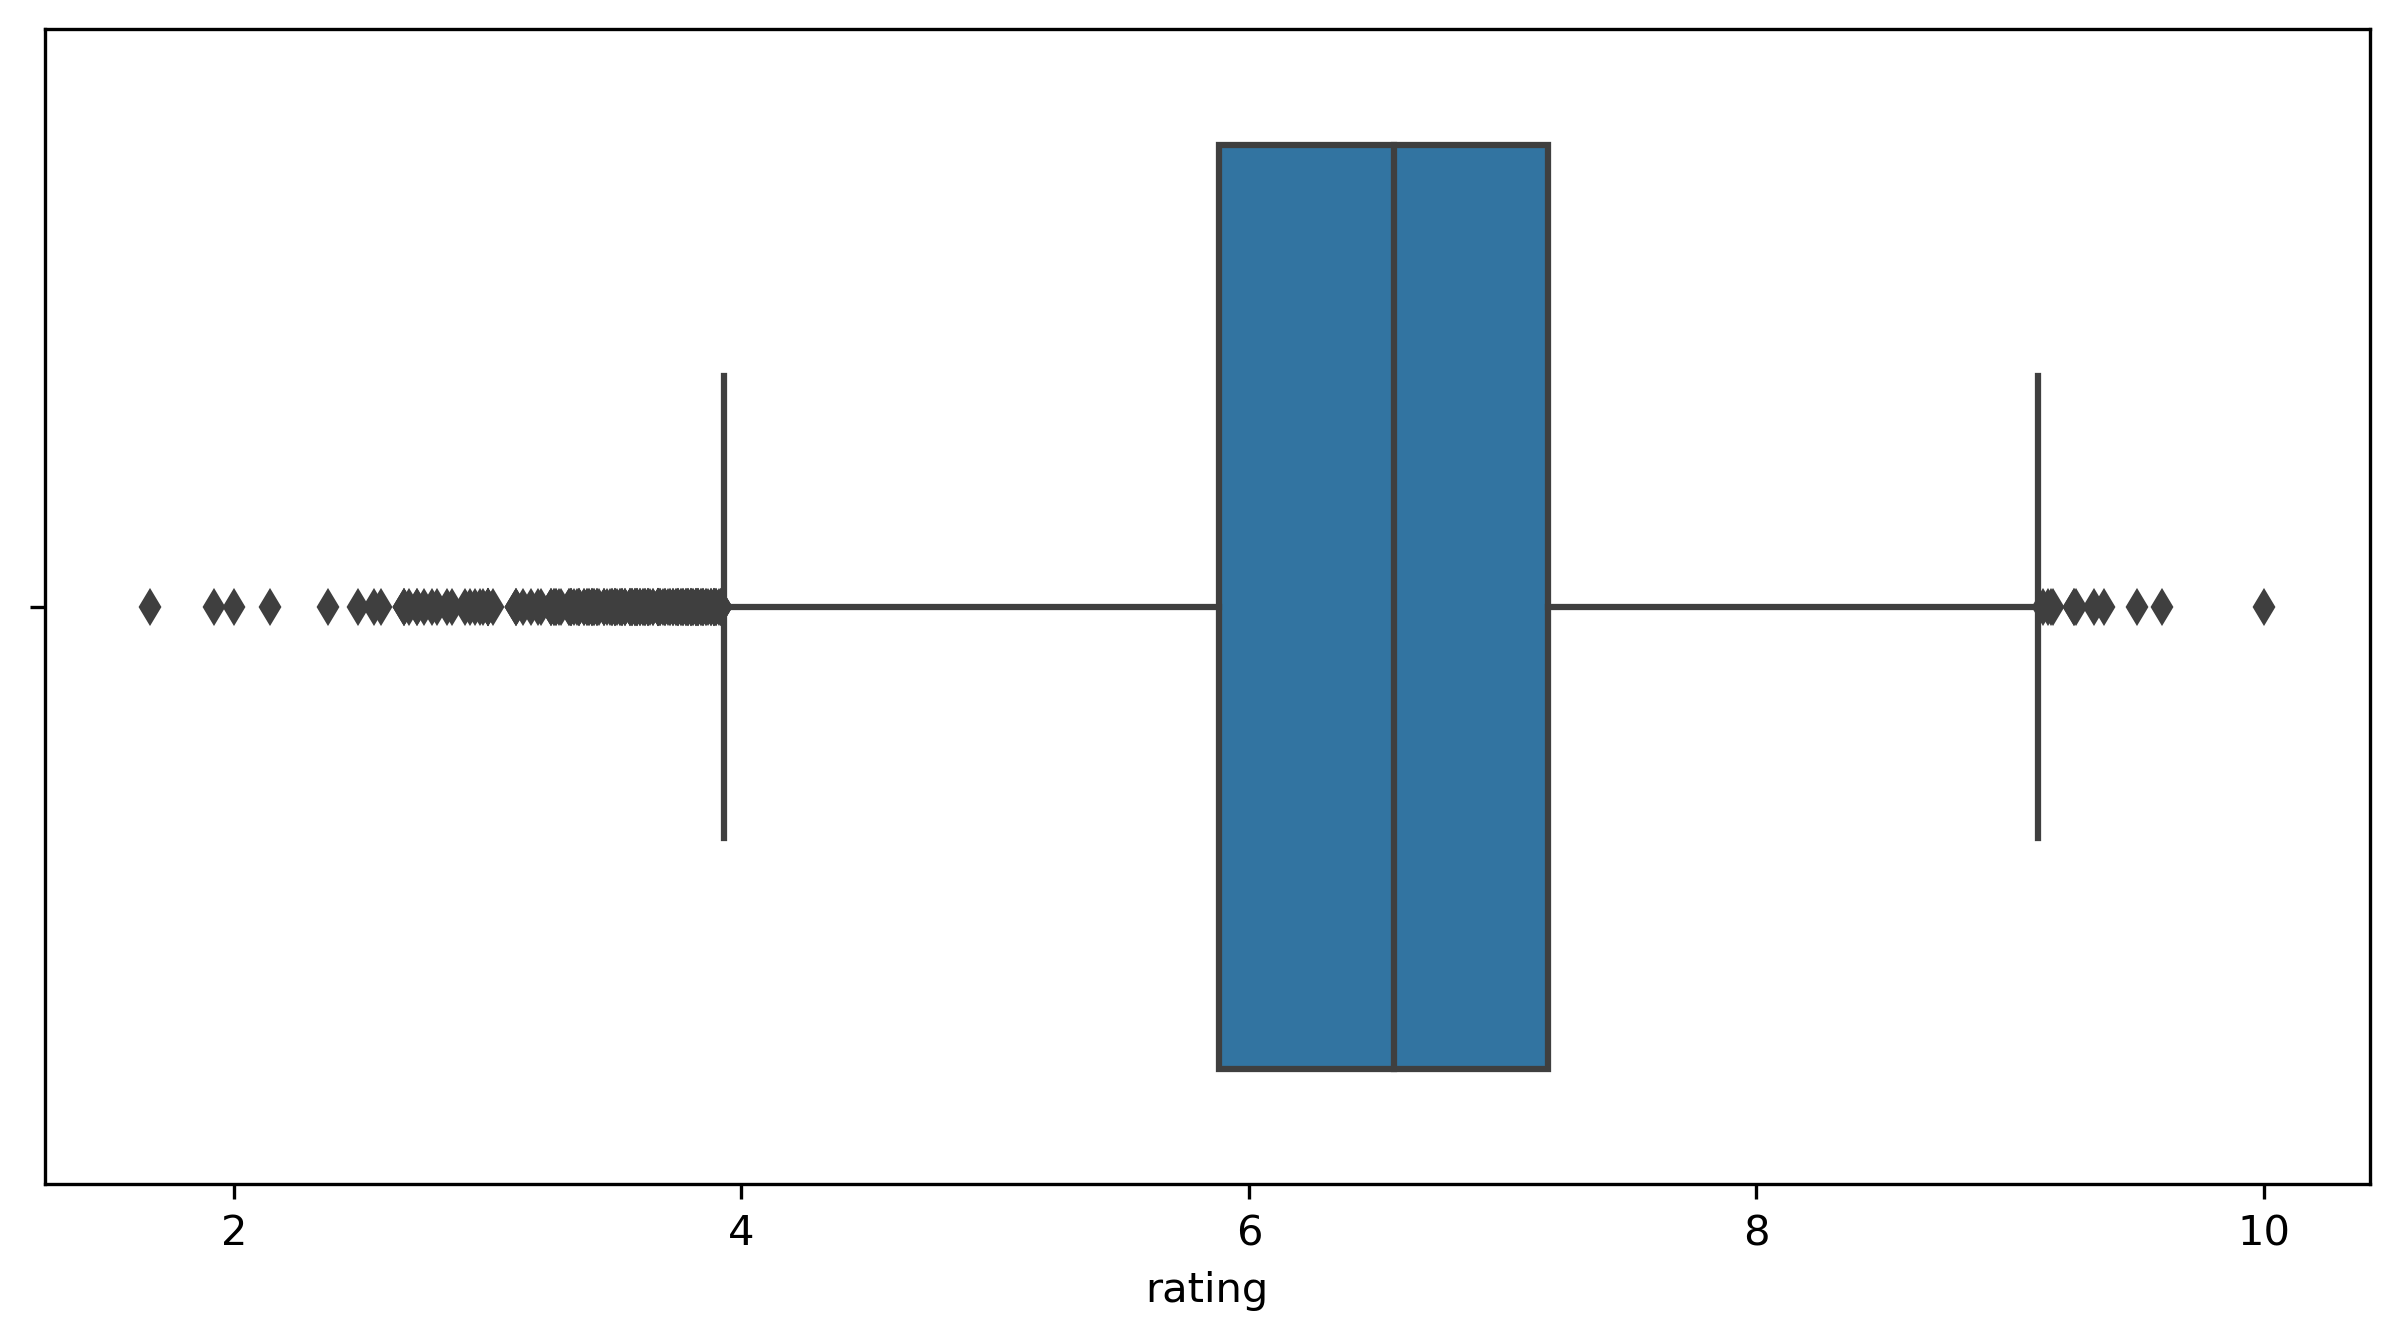

In [22]:
# now for rating column we will check if there are any outliers present or not 
sns.boxplot(x = data['rating'])

In [23]:
# there are outliers present so we will replace missing values with median of the column 
data['rating'].fillna(data['rating'].median(),inplace=True)

In [24]:
data.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

<Axes: >

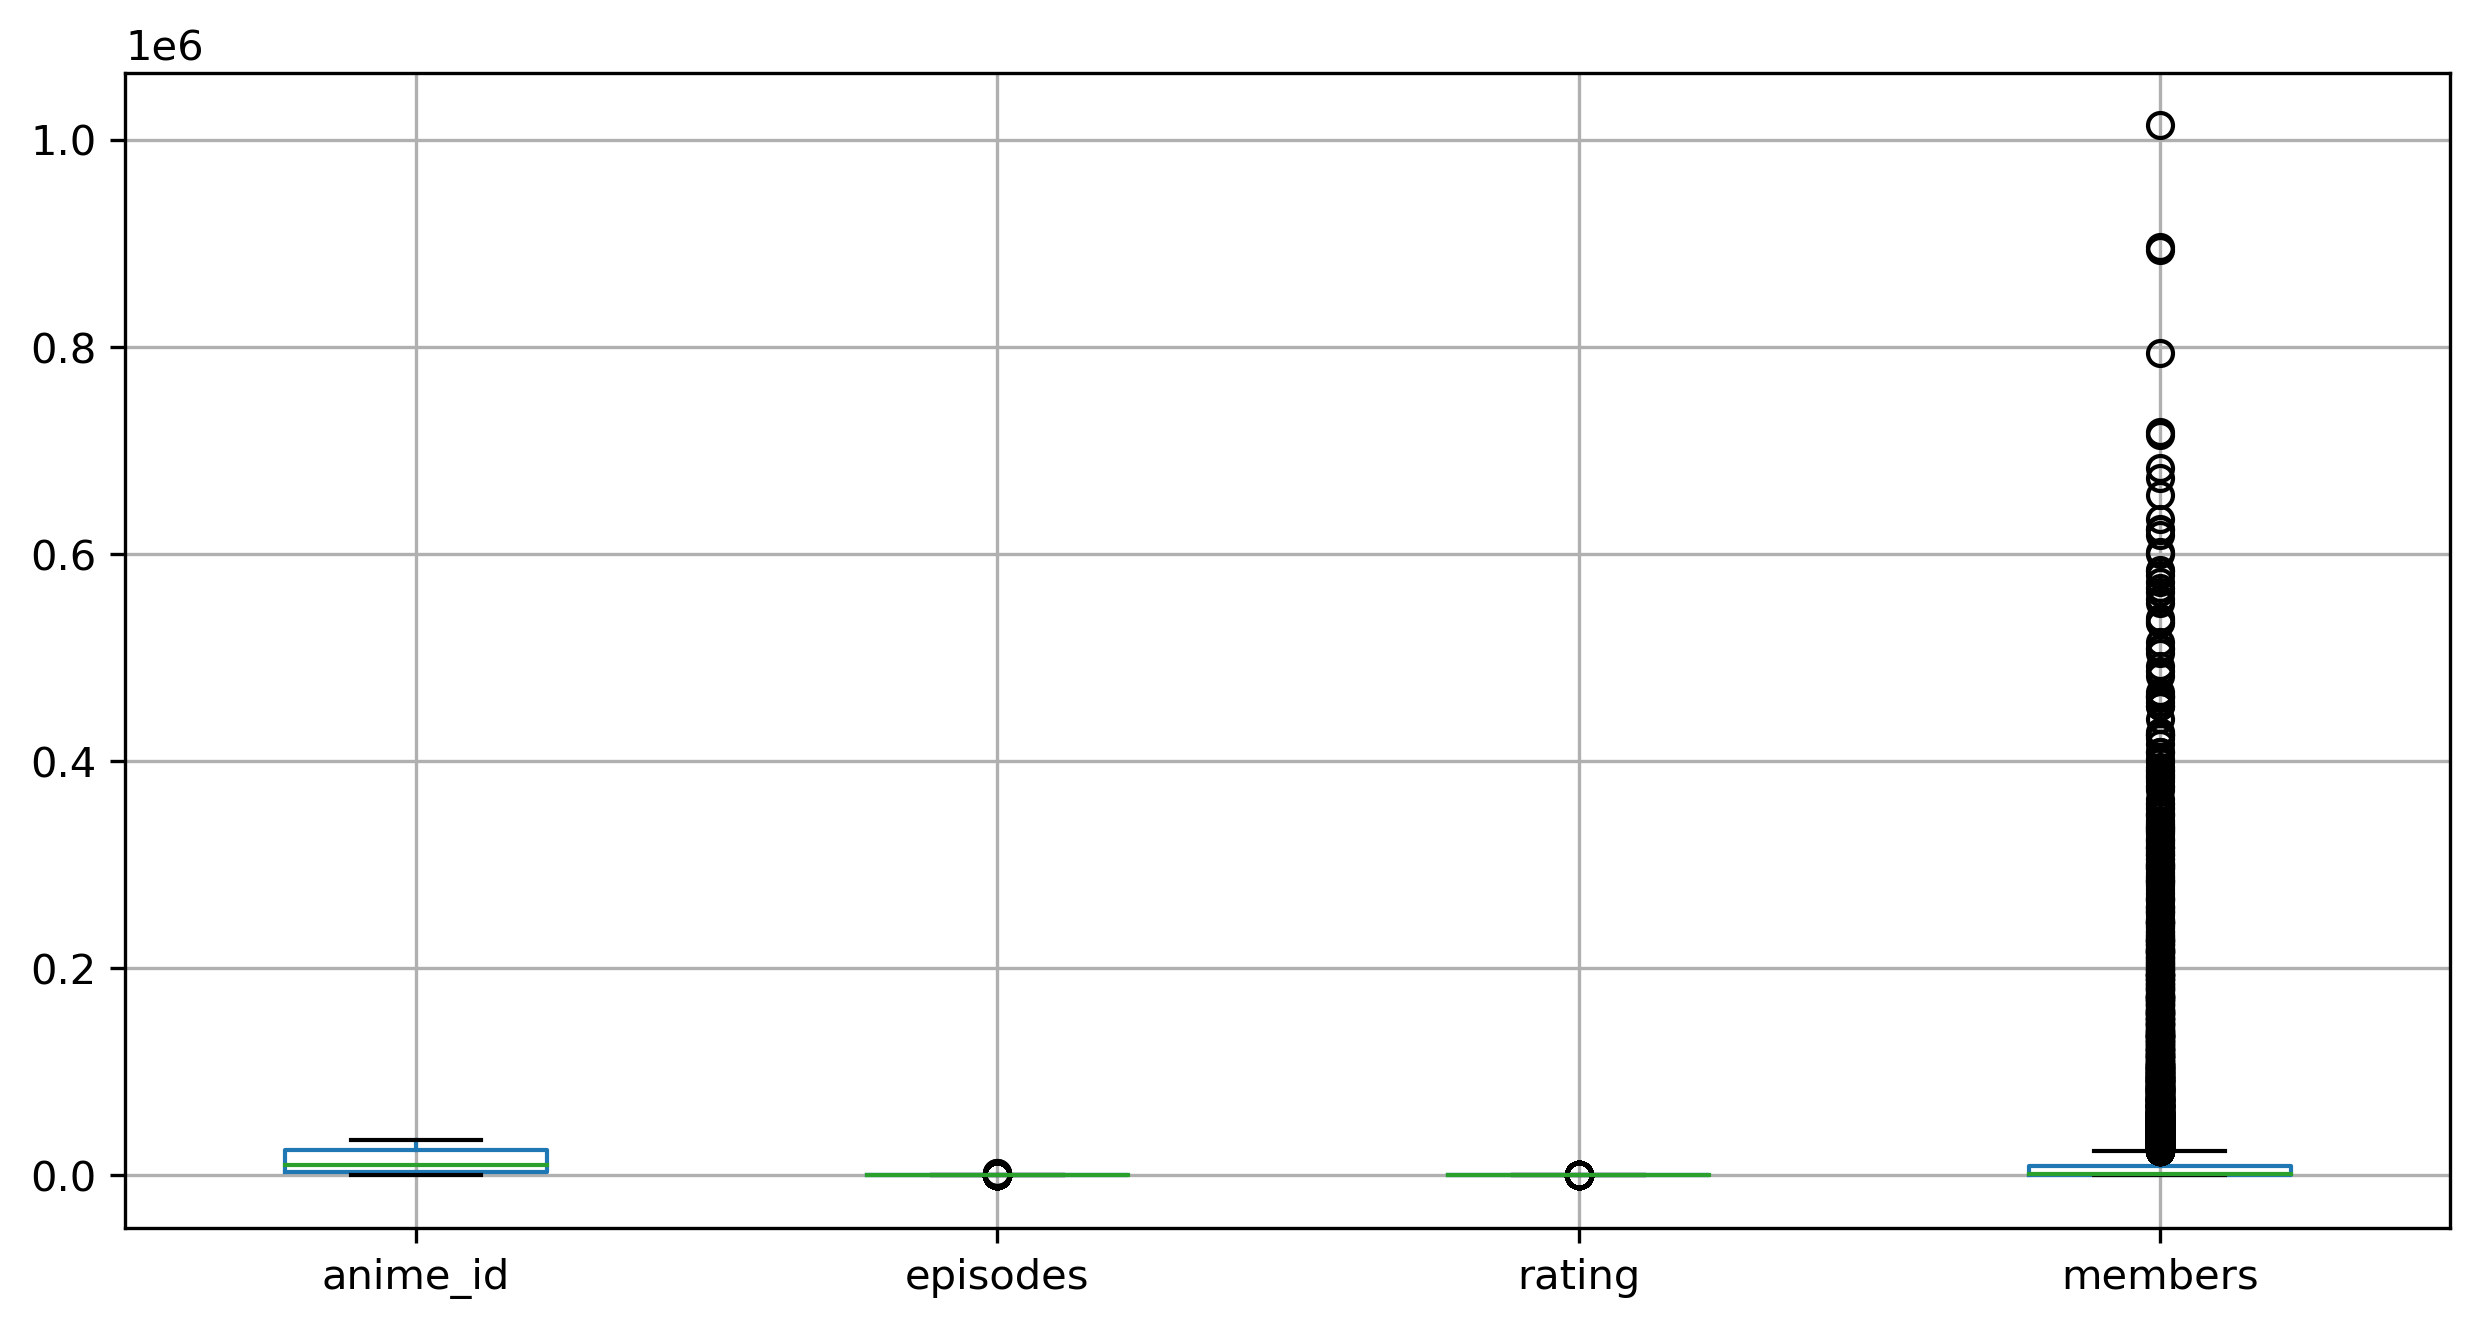

In [25]:
# all missing values treated 
# now we will go for outliers treatment 
data.boxplot()

In [26]:
data.describe()

anime_id      episodes        rating       members
count  12294.000000  12294.000000  12294.000000  1.229400e+04
mean   14058.221653     12.040101      6.475700  1.807134e+04
std    11455.294701     46.257299      1.017179  5.482068e+04
min        1.000000      0.000000      1.670000  5.000000e+00
25%     3484.250000      1.000000      5.900000  2.250000e+02
50%    10260.500000      2.000000      6.570000  1.550000e+03
75%    24794.500000     12.000000      7.170000  9.437000e+03
max    34527.000000   1818.000000     10.000000  1.013917e+06

In [27]:
# defining function to calculate lower and upper extreme 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3 - q1 
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    return lower_extreme,upper_extreme

In [28]:
# defining function for treating outliers
def outlier_treatment(data,colname):
    lower_extreme,upper_extreme = outlier_detection(data,colname)
    data.loc[data[colname]>upper_extreme,colname] = upper_extreme 
    data.loc[data[colname]<lower_extreme,colname] = lower_extreme
    
    print(f"All the outliers for column {colname} are treated !!!")

In [29]:
# removing outliers 
outlier_treatment(data,'episodes')
outlier_treatment(data,'rating')
outlier_treatment(data,'members')

All the outliers for column episodes are treated !!!
All the outliers for column rating are treated !!!
All the outliers for column members are treated !!!


<Axes: >

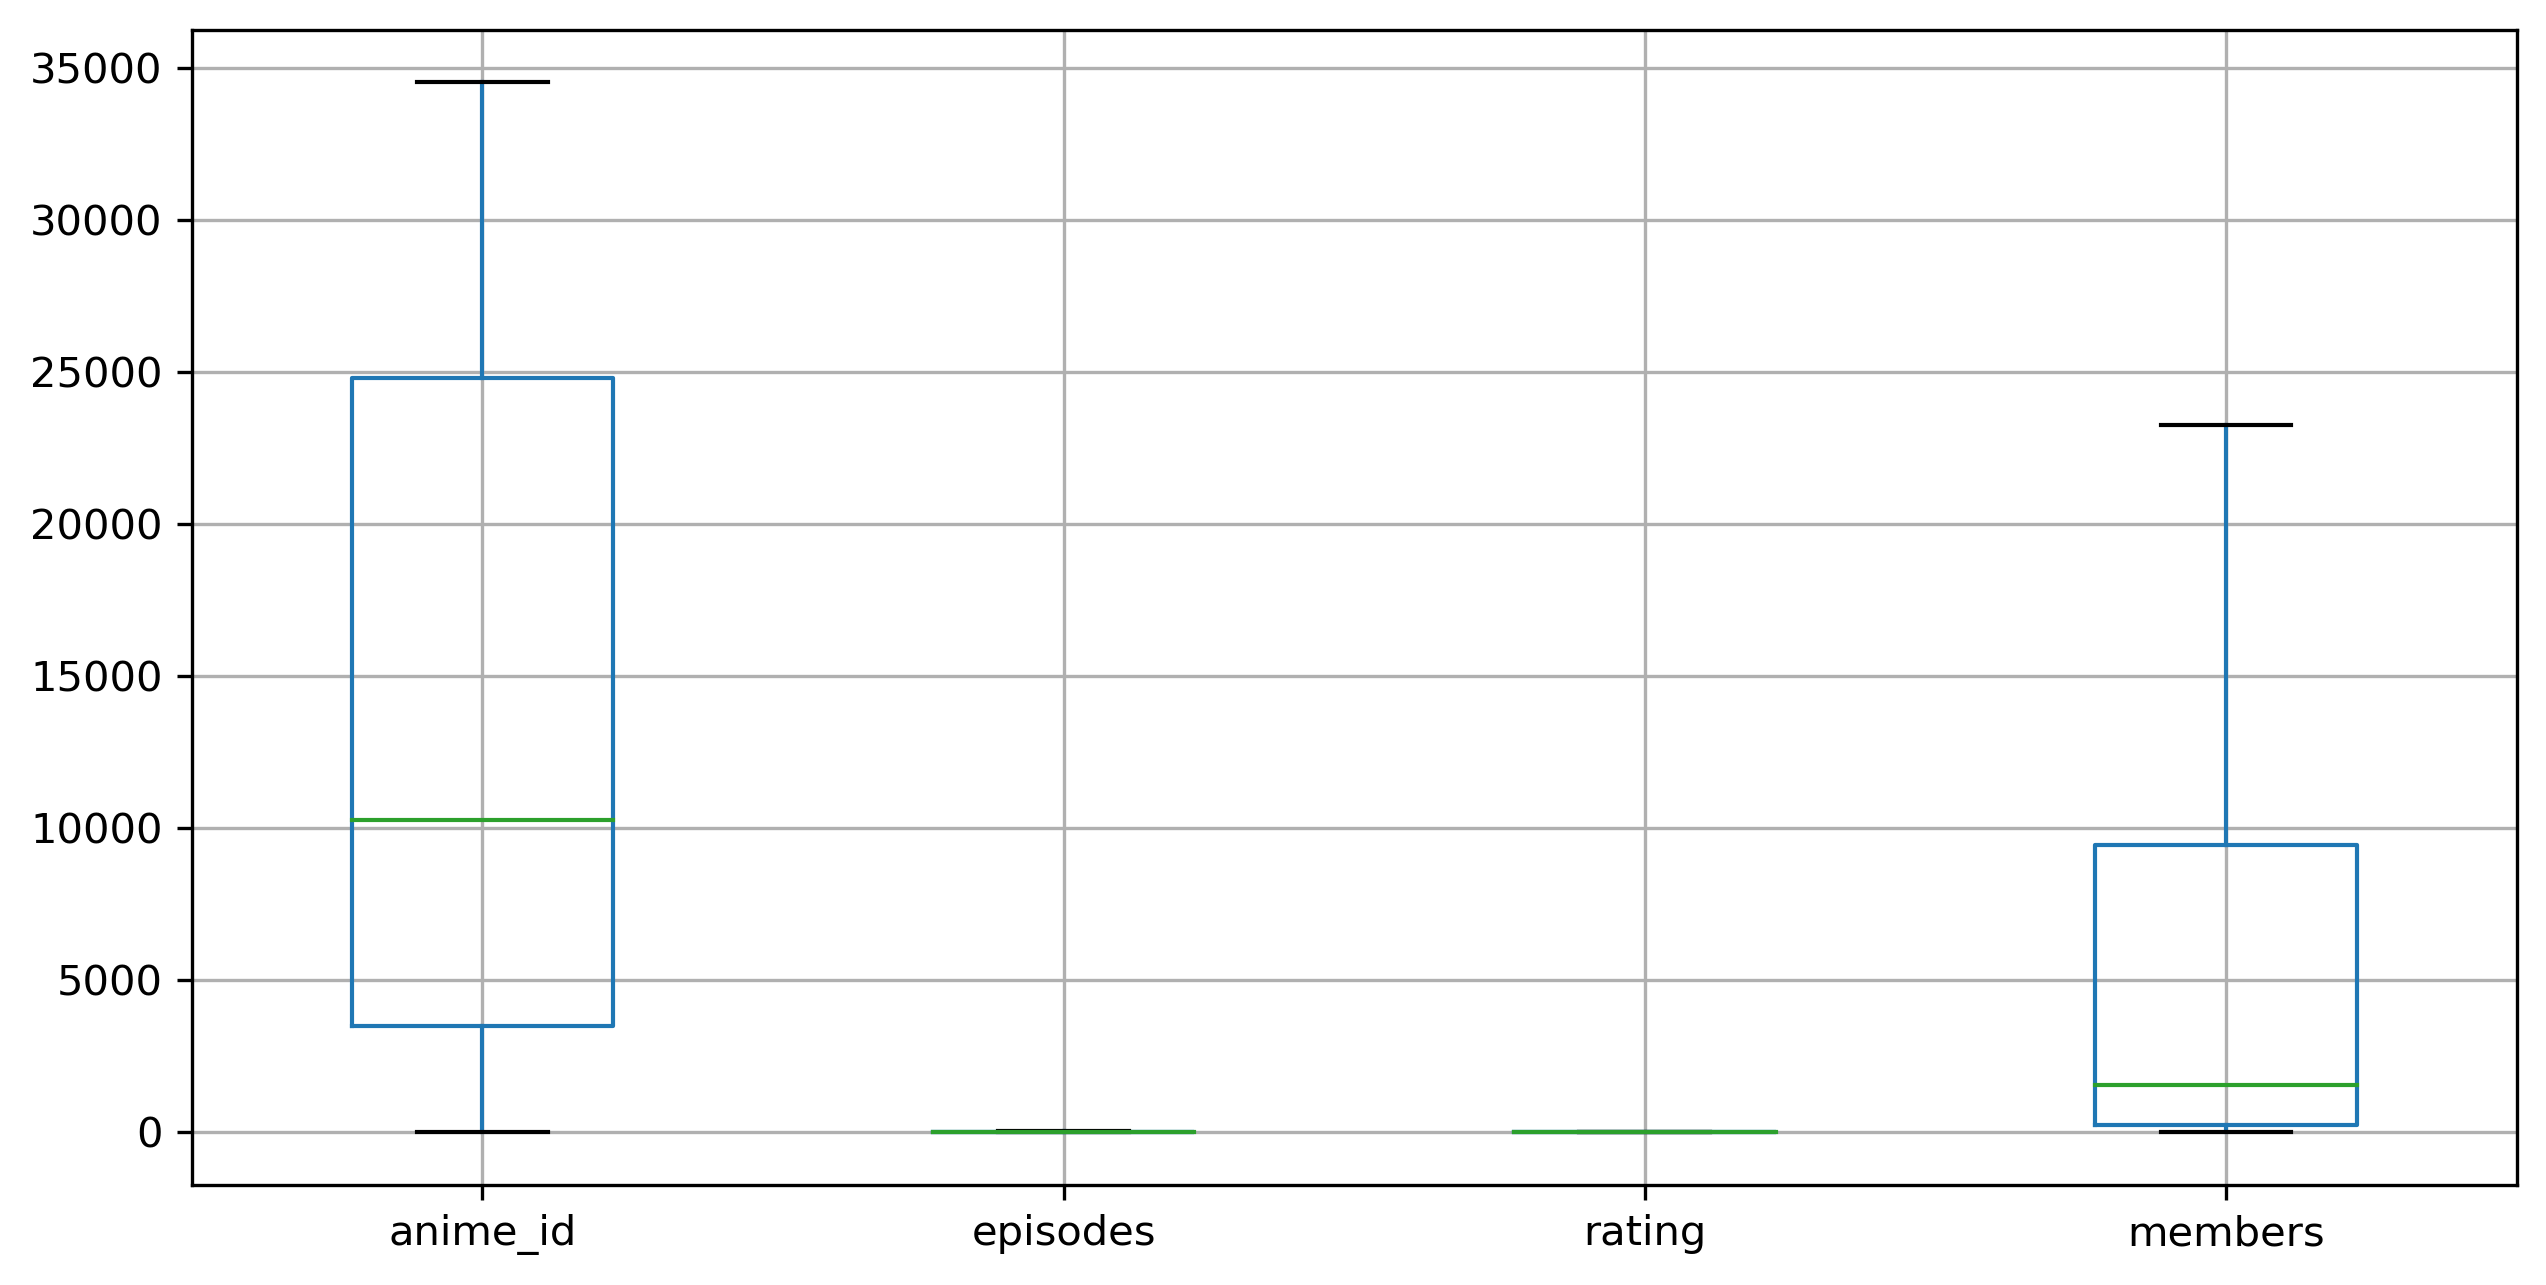

In [30]:
data.boxplot()

In [31]:
data.describe()

anime_id      episodes        rating       members
count  12294.000000  12294.000000  12294.000000  12294.000000
mean   14058.221653      7.493777      6.484671   6272.463315
std    11455.294701      9.690095      0.989762   8570.835037
min        1.000000      0.000000      3.995000      5.000000
25%     3484.250000      1.000000      5.900000    225.000000
50%    10260.500000      2.000000      6.570000   1550.000000
75%    24794.500000     12.000000      7.170000   9437.000000
max    34527.000000     28.500000      9.075000  23255.000000

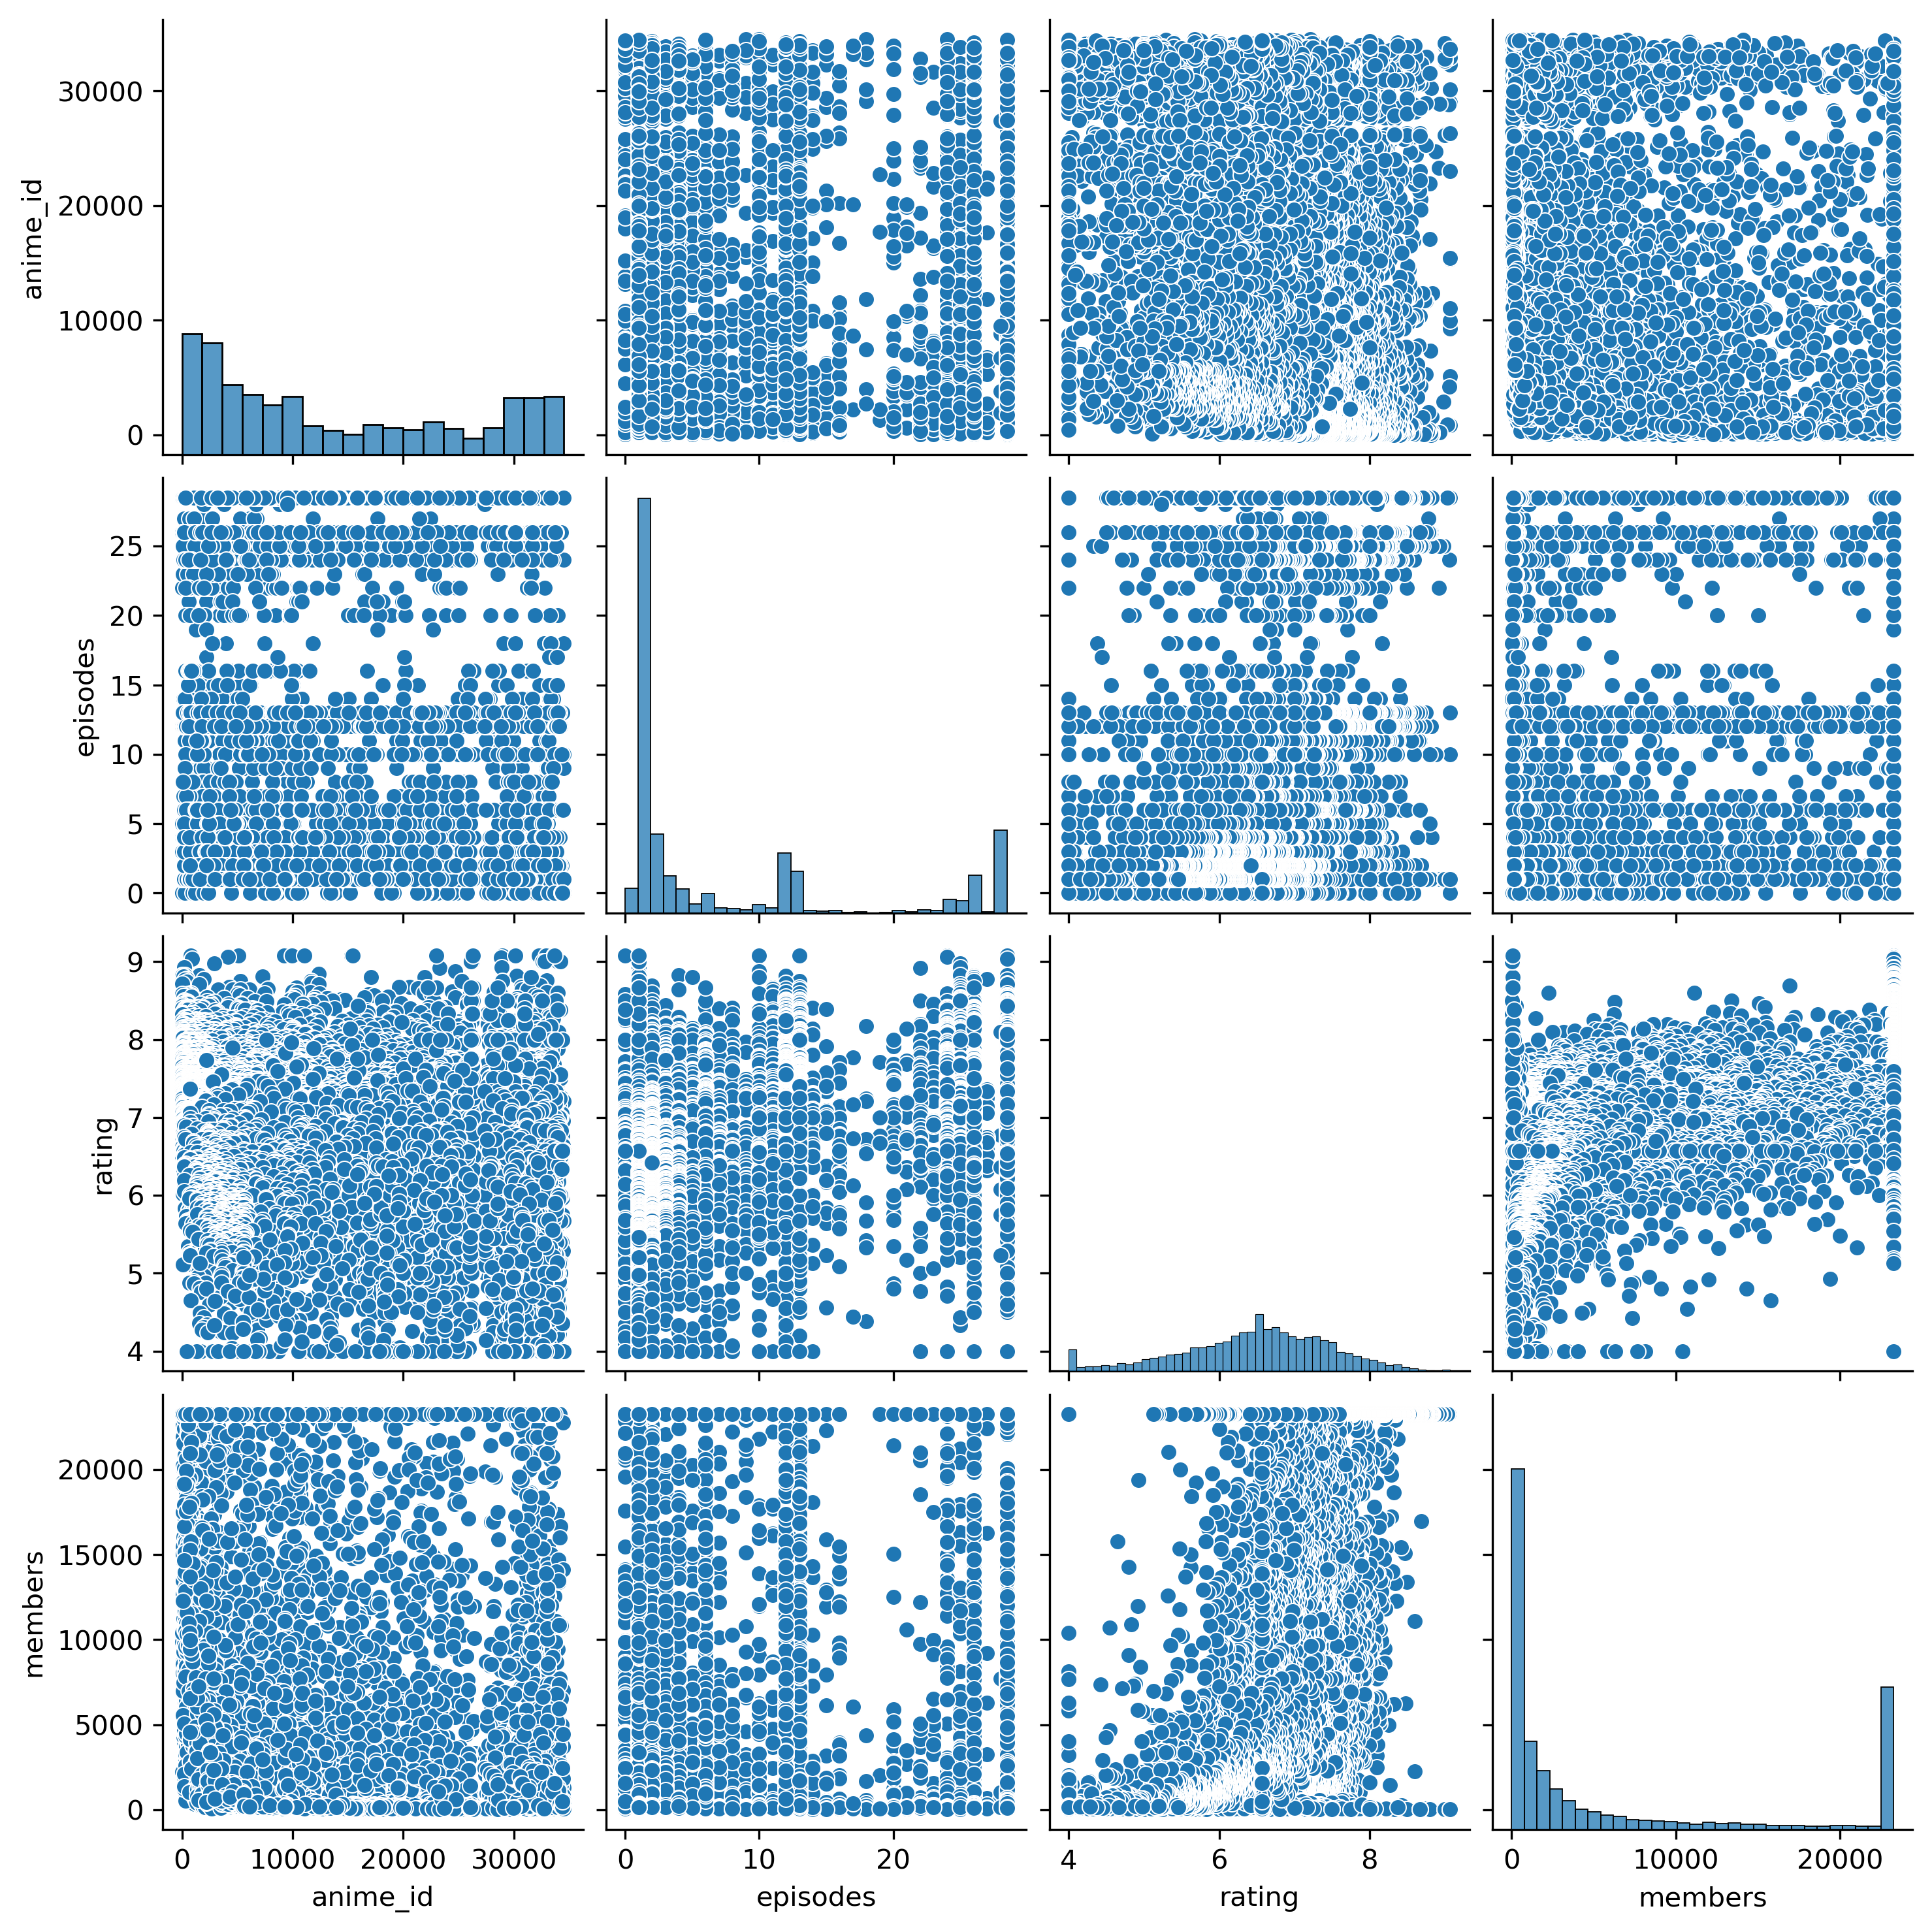

In [32]:
sns.pairplot(data)

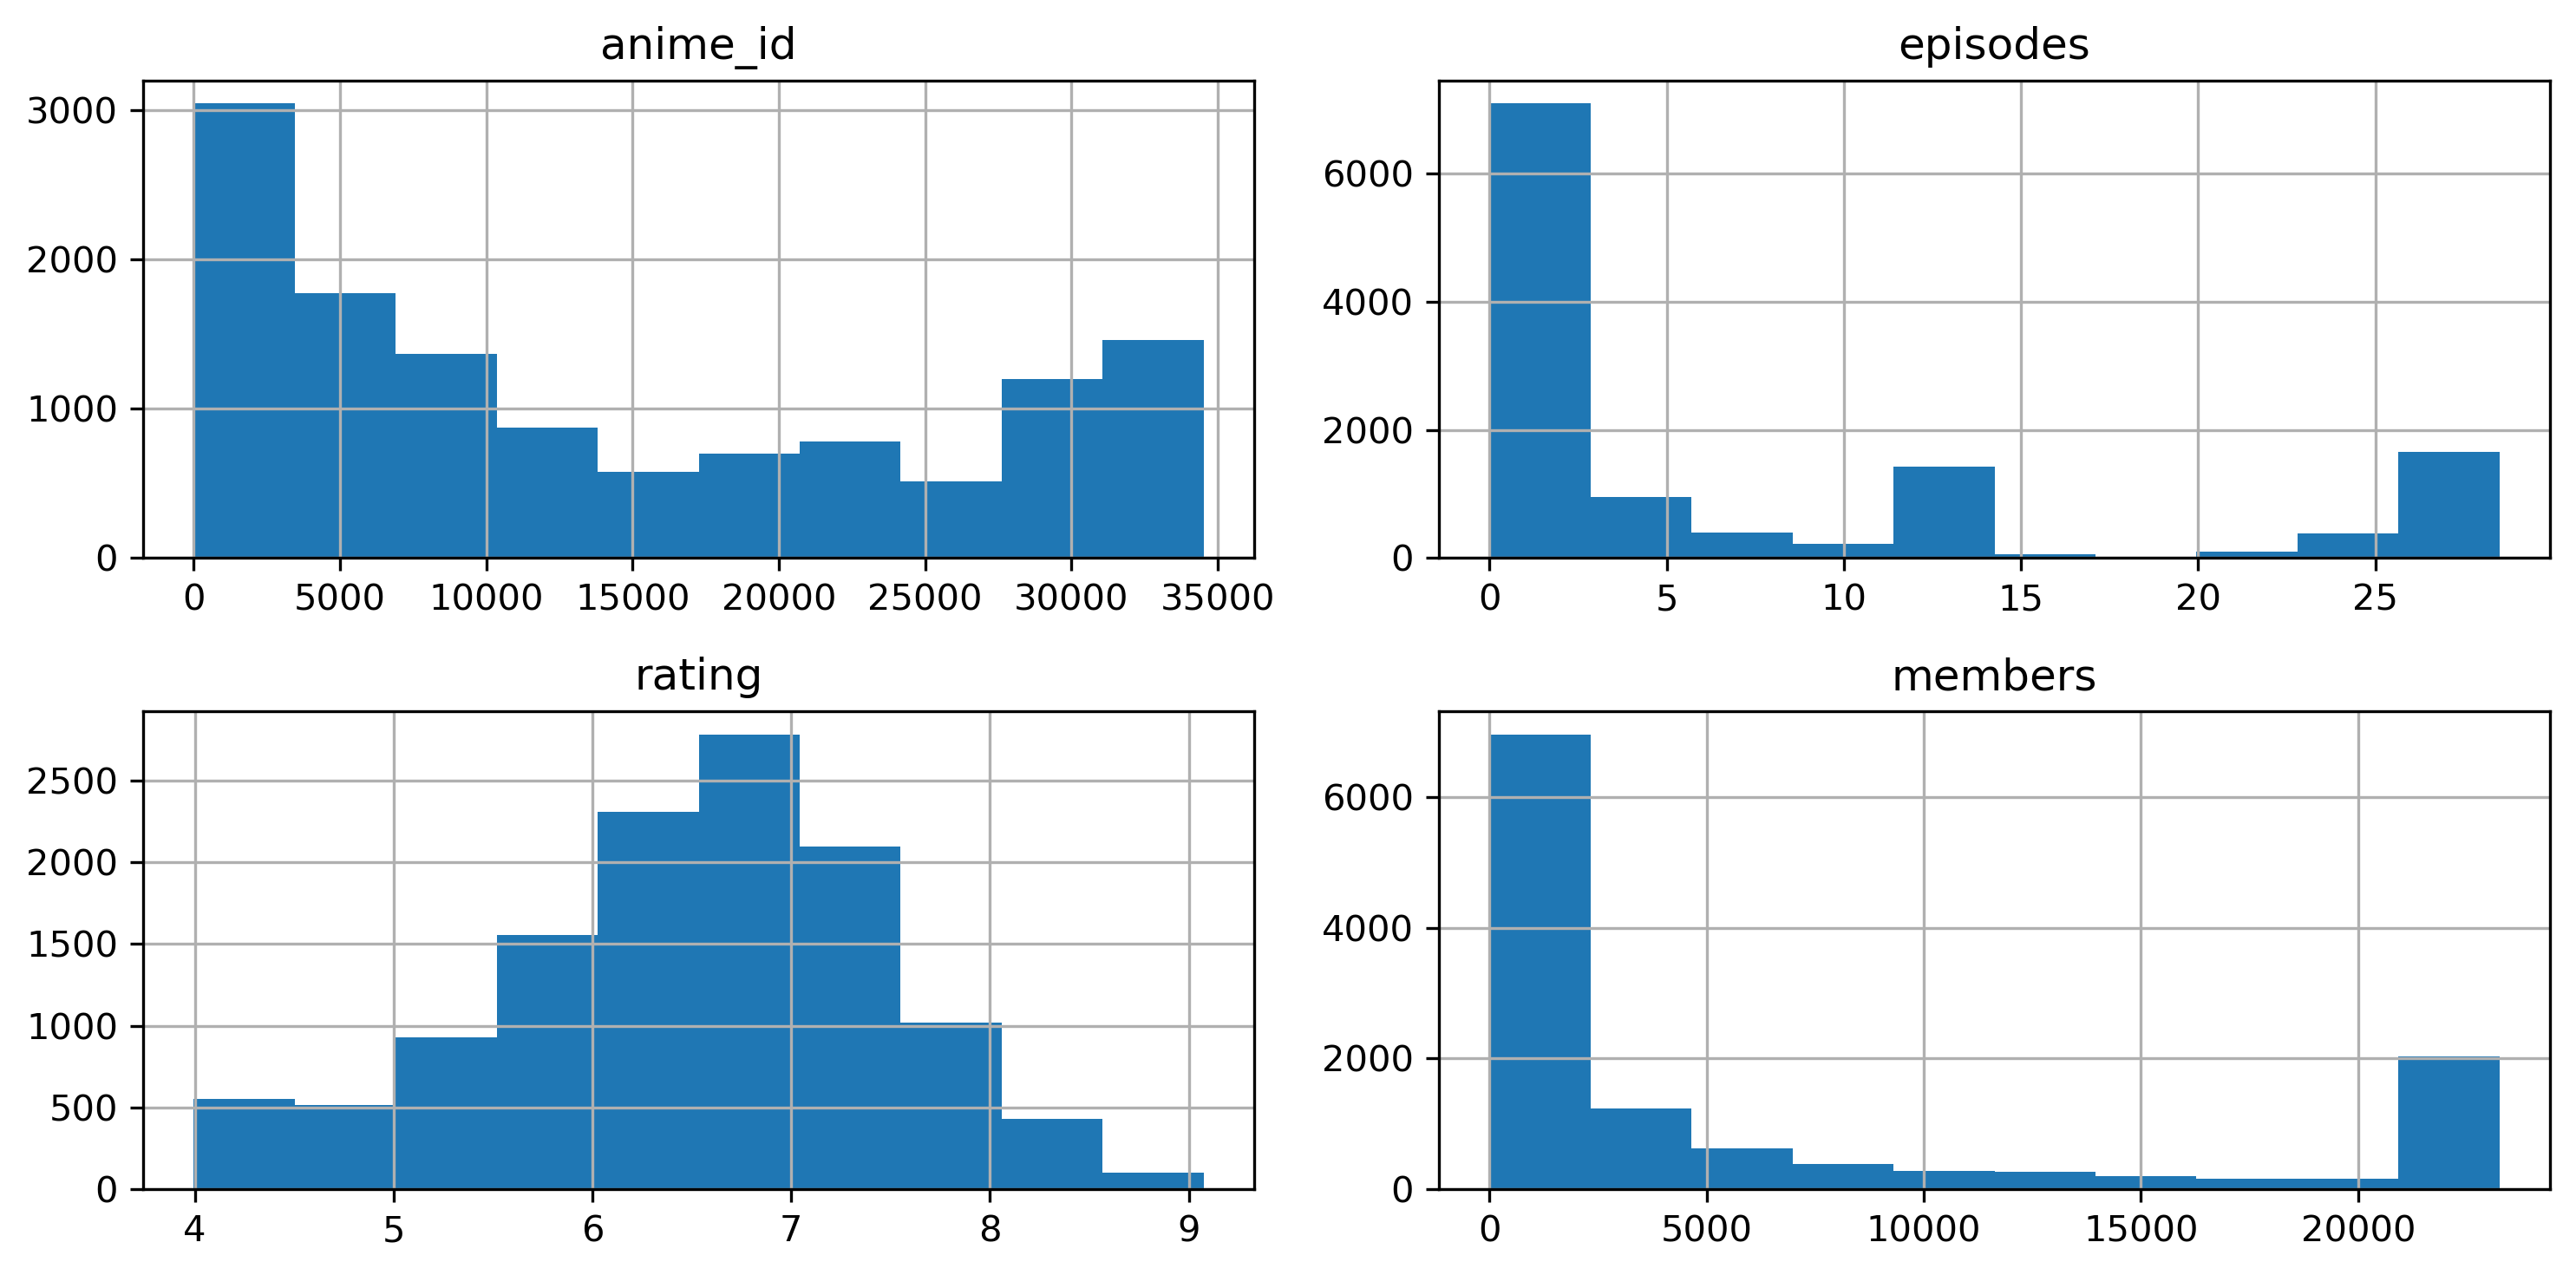

In [33]:
data.hist()
plt.tight_layout()

#### Recommendation Systems

In [36]:
from sklearn.metrics import pairwise_distances 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine,correlation

In [37]:
data.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [50]:
# we will perform first text vectorization 
tfidf = TfidfVectorizer(stop_words = 'english')
genre_matrix = tfidf.fit_transform(data['genre'])

In [47]:
# normalizing the rating using minmaxscaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
scaler = MinMaxScaler()
data['rating_scaled'] = scaler.fit_transform(data[['rating']])

In [70]:
def recommend_anime(target_anime, genre_matrix, threshold=0.2):
    if target_anime not in train_data['name'].values:
        return []

    target_index = train_data[train_data['name'] == target_anime].index[0]
    similarity_scores = cosine_similarity(genre_matrix[target_index], genre_matrix).flatten()

    similar_anime_indices = [i for i, score in enumerate(similarity_scores) if score > threshold and i != target_index]
    recommended_anime = train_data.iloc[similar_anime_indices]['name'].values

    return recommended_anime

In [65]:
target_anime = "Naruto"
recommendations = recommend_anime(target_anime, threshold=0.2)
print(f"Recommended anime for {target_anime}:\n{recommendations}")

Recommended anime for Naruto:
6                                   Hunter x Hunter (2011)
13                      Code Geass: Hangyaku no Lelouch R2
19                         Code Geass: Hangyaku no Lelouch
20                                          Hajime no Ippo
21       Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...
                               ...                        
11930                                V.G.Neo The Animation
12020                                 Sexy Sailor Soldiers
12106                             Sailor Senshi Venus♥Five
12146                                           Dochinpira
12221                           Kunoichi Gakuen Ninpouchou
Name: name, Length: 1488, dtype: object


#### Evaluation 

In [69]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [71]:
y_true = []
y_pred = []

In [72]:
for index, row in test_data.iterrows():
    target_anime = row['name']
    
    actual_similar_anime = test_data['name'].head(3).tolist()
    
    recommended_anime = recommend_anime(target_anime, genre_matrix, threshold=0.2)
    
    y_true += [1 if anime in actual_similar_anime else 0 for anime in test_data['name']]
    y_pred += [1 if anime in recommended_anime else 0 for anime in test_data['name']]

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.4994
Recall: 0.5000
F1-Score: 0.4997


In [75]:
'''
Analysis of Performance of the Recommendation System:
 The recommendation system shows moderate performance with acceptable precision, recall, and F1-scores. However, 
 the use of genre-based similarity alone may result in limited diversity in recommendations, as many anime may share 
 similar genres but differ in popularity, style, or audience reception.

Areas of Improvement: 
 Areas of improvement include incorporating additional features such as user ratings, episode counts, and member scores 
 to enhance the recommendation accuracy and better capture anime preferences beyond genre similarity.
'''

'\nAnalysis of Performance of the Recommendation System:\n The recommendation system shows moderate performance with acceptable precision, recall, and F1-scores. However, \n the use of genre-based similarity alone may result in limited diversity in recommendations, as many anime may share \n similar genres but differ in popularity, style, or audience reception.\n\nAreas of Improvement: \n Areas of improvement include incorporating additional features such as user ratings, episode counts, and member scores \n to enhance the recommendation accuracy and better capture anime preferences beyond genre similarity.\n'

#### Interview Questions 

In [ ]:
'''
1. Can you explain the difference between user-based and item-based collaborative filtering?
-> User-based collaborative filtering recommends items to a user based on the preferences of similar users, while item-based 
   collaborative filtering recommends items similar to those the user has previously liked or interacted with.

2. What is collaborative filtering, and how does it work?
-> Collaborative filtering is a recommendation technique that predicts a user's preferences by analyzing patterns of likes or 
   interactions from similar users or items. It works by leveraging large datasets of user-item interactions to find 
   similarities.
'''